1. Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#convert bottle csv file to pandas dataframe
bottle_df = pd.read_csv("bottle.csv")
bottle_df.head()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#look at number, types of columns
print(bottle_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [3]:
#look at mean, max/min, and other stats generated by .describe()
print(bottle_df.describe())

             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587267     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.3600

In [4]:
#remove any spaces
bottle_df.columns = bottle_df.columns.str.replace(' ', '')
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DICQualityComment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop rows of 50+ NaNs
noNaN_bottle_df = bottle_df.dropna(axis=0, thresh=50)
noNaN_bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DICQualityComment
674906,27546,674907,090.0 028.0,19-9310NM-PR-290-1902-09000280-0002A-3,2,19.26,33.201,5.95,23.582,112.4,...,0.38,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674907,27546,674908,090.0 028.0,19-9310NM-PR-290-1902-09000280-0005A-3,5,19.20,33.199,5.97,23.596,112.7,...,0.38,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674908,27546,674909,090.0 028.0,19-9310NM-PR-290-1902-09000280-0009A-3,9,18.88,33.215,6.00,23.689,112.5,...,0.38,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674910,27546,674911,090.0 028.0,19-9310NM-PR-290-1902-09000280-0013A-3,13,16.57,33.257,6.03,24.278,108.2,...,0.22,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674911,27546,674912,090.0 028.0,19-9310NM-PR-290-1902-09000280-0019A-3,19,15.96,33.234,6.19,24.400,109.7,...,0.27,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop columns with 225+ NaNs
noNaNs_bottle_df = noNaN_bottle_df.dropna(axis=1, thresh=225)
noNaNs_bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES,R_SAMP
674906,27546,674907,090.0 028.0,19-9310NM-PR-290-1902-09000280-0002A-3,2,19.26,33.201,5.95,23.582,112.4,...,5.95,112.4,3.0,0.31,0.2,0.01,1.02,0.38,2,NaN
674907,27546,674908,090.0 028.0,19-9310NM-PR-290-1902-09000280-0005A-3,5,19.20,33.199,5.97,23.596,112.7,...,5.97,112.7,2.8,0.31,0.2,0.01,1.10,0.38,5,NaN
674908,27546,674909,090.0 028.0,19-9310NM-PR-290-1902-09000280-0009A-3,9,18.88,33.215,6.00,23.689,112.5,...,6.00,112.5,2.8,0.31,0.1,0.01,1.09,0.38,9,NaN
674910,27546,674911,090.0 028.0,19-9310NM-PR-290-1902-09000280-0013A-3,13,16.57,33.257,6.03,24.278,108.2,...,6.03,108.2,2.1,0.34,0.1,0.00,0.50,0.22,13,NaN
674911,27546,674912,090.0 028.0,19-9310NM-PR-290-1902-09000280-0019A-3,19,15.96,33.234,6.19,24.400,109.7,...,6.19,109.7,2.2,0.36,0.1,0.00,0.61,0.27,19,NaN


In [7]:
print(noNaNs_bottle_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'RecInd',
       'T_prec', 'S_prec', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM',
       'NO3uM', 'C14As1', 'C14As2', 'DarkAs', 'MeanAs', 'IncTim', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT',
       'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_CHLA',
       'R_PHAEO', 'R_PRES', 'R_SAMP'],
      dtype='object')


2) Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

Decided to drop columns with dates, formatting of which might not play nice with regression models; dropped depth ID as it also contains wonky formatting (and we can use index as a unique identifier, making depth ID redundant); dropped other info not relevant to regression tasks.  Columns included: "Cst_Cnt", "Sta_ID", "Depth_ID", "R_SAMP", "RecInd", "T_prec", "S_prec", "IncTim"

Also dropped columns that held essentially the same information as other columns - no need for duplicate/redundant info: 'R_TEMP', 'R_SALINITY', 'R_Depth', 'R_PO4', 'R_NO2', 'R_NO3', 'R_PHAEO'

After running correlation matrix, decided on data frame keeping only highly correlated features: "T_degC", "Salnty", "O2Sat", "R_POTEMP", "R_SVA", "R_O2Sat", "R_PHAEO"

In [8]:
#dropping columns with individual entry ID info, date info that might mess up functions,
#other info not necessary for data modeling task
new_bottle_df = noNaNs_bottle_df.drop(columns=["Cst_Cnt", "Sta_ID", "Depth_ID", "R_SAMP", "RecInd", "T_prec", 
                                               "S_prec", "IncTim"])
new_bottle_df.head()

,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
674906,674907,2,19.26,33.201,5.95,23.582,112.4,259.6050,1.02,0.38,...,0.009,5.95,112.4,3.0,0.31,0.2,0.01,1.02,0.38,2
674907,674908,5,19.20,33.199,5.97,23.596,112.7,260.4741,1.10,0.38,...,0.020,5.97,112.7,2.8,0.31,0.2,0.01,1.10,0.38,5
674908,674909,9,18.88,33.215,6.00,23.689,112.5,261.7592,1.09,0.38,...,0.030,6.00,112.5,2.8,0.31,0.1,0.01,1.09,0.38,9
674910,674911,13,16.57,33.257,6.03,24.278,108.2,262.9167,0.50,0.22,...,0.050,6.03,108.2,2.1,0.34,0.1,0.00,0.50,0.22,13
674911,674912,19,15.96,33.234,6.19,24.400,109.7,269.8608,0.61,0.27,...,0.070,6.19,109.7,2.2,0.36,0.1,0.00,0.61,0.27,19


In [9]:
#looking at how many rows, columns we have now
new_bottle_df

,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
674906,674907,2,19.260,33.2010,5.950,23.58200,112.40,259.6050,1.020,0.380,...,0.009,5.95,112.4,3.0,0.31,0.2,0.01,1.02,0.38,2
674907,674908,5,19.200,33.1990,5.970,23.59600,112.70,260.4741,1.100,0.380,...,0.020,5.97,112.7,2.8,0.31,0.2,0.01,1.10,0.38,5
674908,674909,9,18.880,33.2150,6.000,23.68900,112.50,261.7592,1.090,0.380,...,0.030,6.00,112.5,2.8,0.31,0.1,0.01,1.09,0.38,9
674910,674911,13,16.570,33.2570,6.030,24.27800,108.20,262.9167,0.500,0.220,...,0.050,6.03,108.2,2.1,0.34,0.1,0.00,0.50,0.22,13
674911,674912,19,15.960,33.2340,6.190,24.40000,109.70,269.8608,0.610,0.270,...,0.070,6.19,109.7,2.2,0.36,0.1,0.00,0.61,0.27,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860736,860737,2,16.298,33.5456,5.731,24.56225,102.47,249.8100,0.251,0.050,...,0.007,5.73,102.5,1.8,0.30,0.0,0.03,0.25,0.05,2
862015,862016,5,20.955,33.6050,5.761,23.44628,112.57,251.3900,0.689,0.138,...,0.021,5.76,112.6,1.6,0.11,0.0,0.00,0.69,0.14,5
862805,862806,17,19.162,33.3609,5.394,23.73049,101.80,235.3100,0.061,0.011,...,0.071,5.39,101.8,1.9,0.26,0.0,0.00,0.06,0.01,17
862979,862980,74,11.083,33.2459,4.564,25.39864,73.10,198.7900,0.067,0.089,...,0.252,4.56,73.1,10.4,1.16,14.2,0.00,0.07,0.09,75


In [10]:
#looking at columns we have now
print(new_bottle_df.columns)

Index(['Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM',
       'C14As1', 'C14As2', 'DarkAs', 'MeanAs', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_CHLA', 'R_PHAEO', 'R_PRES'],
      dtype='object')


In [11]:
#look at .describe() stats of partially cleaned dataset
print(new_bottle_df.describe())

             Btl_Cnt      Depthm      T_degC      Salnty      O2ml_L  \
count     244.000000  244.000000  244.000000  244.000000  244.000000   
mean   806088.528689   23.569672   14.439660   33.360515    5.633631   
std     45295.735038   25.435452    2.288694    0.225809    0.659879   
min    674907.000000    0.000000   10.150000   31.101000    2.740000   
25%    803137.250000    2.000000   12.790000   33.279750    5.578250   
50%    826283.500000   15.000000   14.290000   33.376500    5.830000   
75%    827328.250000   40.250000   15.637500   33.465500    6.000000   
max    863461.000000  116.000000   21.370000   33.873000    6.700000   

           STheta       O2Sat  Oxy_µmol/Kg      ChlorA      Phaeop  ...  \
count  244.000000  244.000000   244.000000  244.000000  244.000000  ...   
mean    24.805352   97.138525   245.525219    0.672008    0.231959  ...   
std      0.528986   13.029840    28.793301    1.100940    0.309318  ...   
min     23.158000   43.500000   119.277600    0.020

In [12]:
#looking at quantiles, interquartile range
Q1 = new_bottle_df.quantile(0.25)
Q3 = new_bottle_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Btl_Cnt        24191.000000
Depthm            38.250000
T_degC             2.847500
Salnty             0.185750
O2ml_L             0.421750
STheta             0.612568
O2Sat              3.417500
Oxy_µmol/Kg       18.267475
ChlorA             0.509250
Phaeop             0.230000
PO4uM              0.270000
SiO3uM             1.932500
NO2uM              0.090000
NO3uM              3.300000
C14As1             7.790000
C14As2             7.950000
DarkAs             0.106500
MeanAs             7.800000
R_Depth           38.250000
R_TEMP             2.847500
R_POTEMP           2.855000
R_SALINITY         0.185750
R_SIGMA            0.595500
R_SVA             55.550000
R_DYNHT            0.113000
R_O2               0.412500
R_O2Sat            2.600000
R_SIO3             1.900000
R_PO4              0.270000
R_NO3              3.300000
R_NO2              0.090000
R_CHLA             0.510000
R_PHAEO            0.230000
R_PRES            38.250000
dtype: float64


In [13]:
#drop columns with duplicate/redundant information

dedupe_bottle_df = new_bottle_df.drop(['R_TEMP', 'R_SALINITY', 'R_Depth', 'R_PO4', 'R_NO2', 'R_NO3', 'R_PHAEO'], axis=1)

In [38]:
X = dedupe_bottle_df.drop('T_degC', axis=1)
y = dedupe_bottle_df['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [39]:
#Standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

In [40]:
X_train_scaler = np.nan_to_num(X_train)
X_test_scaler = np.nan_to_num(X_test)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regression_df = LinearRegression()
regression_df.fit(X_train_scaler, y_train)

y_pred = regression_df.predict(X_test_scaler)

accuracy_score = regression_df.score(X_test_scaler, y_test)
print(accuracy_score)

0.7120977876677068


In [42]:
#look at other evaluation metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11868430070059878
Mean Squared Error: 1.5099535558321202
Root Mean Squared Error: 1.2288016747352357


In [23]:
#looking at skew of numerical data
print(new_bottle_df.skew())

Btl_Cnt       -1.501731
Depthm         1.126215
T_degC         0.576384
Salnty        -4.129861
O2ml_L        -2.133307
STheta        -0.439345
O2Sat         -2.099079
Oxy_µmol/Kg   -2.137913
ChlorA         5.316108
Phaeop         3.333670
PO4uM          1.905499
SiO3uM         2.429310
NO2uM          2.335210
NO3uM          2.093302
C14As1         3.201908
C14As2         2.643363
DarkAs         8.339343
MeanAs         2.805679
R_Depth        1.126215
R_TEMP         0.576798
R_POTEMP       0.569028
R_SALINITY    -4.129806
R_SIGMA       -0.400378
R_SVA          0.405595
R_DYNHT        1.267076
R_O2          -2.126434
R_O2Sat       -2.236931
R_SIO3         2.430000
R_PO4          1.905499
R_NO3          2.093218
R_NO2          2.336635
R_CHLA         5.316617
R_PHAEO        3.333729
R_PRES         1.126595
dtype: float64


In [24]:
#DarkAs has most drastics skew - look at its range
print(new_bottle_df["DarkAs"].describe())

count    227.000000
mean       0.218304
std        0.721030
min        0.010000
25%        0.058500
50%        0.100000
75%        0.165000
max        6.900000
Name: DarkAs, dtype: float64


In [25]:
#determine outliers for DarkAs column
print(new_bottle_df["DarkAs"].quantile(0.10))
print(new_bottle_df["DarkAs"].quantile(0.90))

0.03
0.31


In [26]:
index = new_bottle_df[(new_bottle_df["DarkAs"] >= 0.31)|(new_bottle_df["DarkAs"] <= 0.03)].index
new_bottle_df.drop(index, inplace=True)
print(new_bottle_df["DarkAs"].skew())

1.0762323115568817


In [27]:
#take a look at new # of rows
new_bottle_df

,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
674907,674908,5,19.200,33.1990,5.970,23.59600,112.70,260.4741,1.100,0.380,...,0.020,5.97,112.7,2.8,0.31,0.2,0.01,1.10,0.38,5
674910,674911,13,16.570,33.2570,6.030,24.27800,108.20,262.9167,0.500,0.220,...,0.050,6.03,108.2,2.1,0.34,0.1,0.00,0.50,0.22,13
674911,674912,19,15.960,33.2340,6.190,24.40000,109.70,269.8608,0.610,0.270,...,0.070,6.19,109.7,2.2,0.36,0.1,0.00,0.61,0.27,19
674913,674914,26,14.840,33.1990,5.860,24.62000,101.60,255.4192,0.930,0.400,...,0.100,5.86,101.6,3.6,0.46,0.6,0.08,0.93,0.40,26
685254,685255,1,14.090,31.1010,5.920,23.15800,99.70,258.4031,1.820,0.310,...,0.003,5.92,100.9,5.9,0.46,1.1,0.25,1.82,0.31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860736,860737,2,16.298,33.5456,5.731,24.56225,102.47,249.8100,0.251,0.050,...,0.007,5.73,102.5,1.8,0.30,0.0,0.03,0.25,0.05,2
862015,862016,5,20.955,33.6050,5.761,23.44628,112.57,251.3900,0.689,0.138,...,0.021,5.76,112.6,1.6,0.11,0.0,0.00,0.69,0.14,5
862805,862806,17,19.162,33.3609,5.394,23.73049,101.80,235.3100,0.061,0.011,...,0.071,5.39,101.8,1.9,0.26,0.0,0.00,0.06,0.01,17
862979,862980,74,11.083,33.2459,4.564,25.39864,73.10,198.7900,0.067,0.089,...,0.252,4.56,73.1,10.4,1.16,14.2,0.00,0.07,0.09,75


In [28]:
#make a correlation matrix & heatmap to see what features are highly correlated with temperature, salinity
corrMatrix = dedupe_bottle_df.corr()
print(corrMatrix)

              Btl_Cnt    Depthm    T_degC    Salnty    O2ml_L    STheta  \
Btl_Cnt      1.000000 -0.099253 -0.009849 -0.043408  0.063886 -0.001840   
Depthm      -0.099253  1.000000 -0.489102  0.071088 -0.487830  0.469025   
T_degC      -0.009849 -0.489102  1.000000 -0.025922  0.365955 -0.949042   
Salnty      -0.043408  0.071088 -0.025922  1.000000 -0.323766  0.334172   
O2ml_L       0.063886 -0.487830  0.365955 -0.323766  1.000000 -0.415353   
STheta      -0.001840  0.469025 -0.949042  0.334172 -0.415353  1.000000   
O2Sat        0.045246 -0.572183  0.643960 -0.264100  0.947196 -0.663687   
Oxy_µmol/Kg  0.064101 -0.489194  0.369973 -0.324635  0.999987 -0.419495   
ChlorA      -0.155159 -0.101599 -0.240316  0.166140  0.144154  0.277013   
Phaeop      -0.159712  0.062607 -0.399742  0.230121 -0.069642  0.440975   
PO4uM       -0.097974  0.500822 -0.715791  0.313986 -0.828103  0.744543   
SiO3uM      -0.156027  0.472277 -0.640071  0.311715 -0.840094  0.671327   
NO2uM       -0.106527  0.

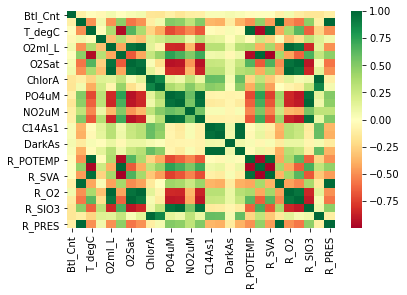

In [29]:
sns.heatmap(dedupe_bottle_df.corr(), annot=False,cmap="RdYlGn")
plt.show()

In [31]:
#create new dataframe from highly correlated features
feat_bottle_df = dedupe_bottle_df[["T_degC", "Salnty", "O2Sat", "R_POTEMP", "R_SVA", "R_O2Sat"]]
feat_bottle_df

,T_degC,Salnty,O2Sat,R_POTEMP,R_SVA,R_O2Sat
674906,19.260,33.2010,112.40,19.26,430.0,112.4
674907,19.200,33.1990,112.70,19.20,428.8,112.7
674908,18.880,33.2150,112.50,18.88,420.0,112.5
674910,16.570,33.2570,108.20,16.57,363.9,108.2
674911,15.960,33.2340,109.70,15.96,352.5,109.7
...,...,...,...,...,...,...
860736,16.298,33.5456,102.47,16.30,336.5,102.5
862015,20.955,33.6050,112.57,20.95,443.1,112.6
862805,19.162,33.3609,101.80,19.16,416.4,101.8
862979,11.083,33.2459,73.10,11.07,258.7,73.1


In [43]:
model_bottle_df = feat_bottle_df.dropna(axis=0)
model_bottle_df = feat_bottle_df.dropna(axis=1)
model_bottle_df

,T_degC,Salnty,O2Sat
674906,19.260,33.2010,112.40
674907,19.200,33.1990,112.70
674908,18.880,33.2150,112.50
674910,16.570,33.2570,108.20
674911,15.960,33.2340,109.70
...,...,...,...
860736,16.298,33.5456,102.47
862015,20.955,33.6050,112.57
862805,19.162,33.3609,101.80
862979,11.083,33.2459,73.10


In [44]:
X = np.array(model_bottle_df['Salnty']).reshape(-1,1)
y = np.array(model_bottle_df['T_degC']).reshape(-1,1)

#always use this format in this order for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LinearRegression

regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

y_pred = regression_df.predict(X_test)

accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

-0.009562955451803301


In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.823174511554465
Mean Squared Error: 5.294829664807849
Root Mean Squared Error: 2.3010496876008237


In [45]:
from statsmodels.formula.api import ols

mdl_sing = ols("T_degC ~ Salnty", data=model_bottle_df).fit()
print(mdl_sing.params)

Intercept    23.204483
Salnty       -0.262730
dtype: float64


3. Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [50]:
#make x = all columns except dependent variable
#make y = dependent variable
X = model_bottle_df.drop('T_degC', axis=1)
y = model_bottle_df['T_degC']

#always use this format in this order for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LinearRegression

regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

y_pred = regression_df.predict(X_test)

accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

0.3478138551217419


In [52]:
#for rmse, the lower that value is, the better the fit

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3863247712366085
Mean Squared Error: 3.4205044155296647
Root Mean Squared Error: 1.8494605742025605


In [51]:
from statsmodels.formula.api import ols

mdl_mult = ols("T_degC ~ Salnty + O2Sat", data=model_bottle_df).fit()
print(mdl_mult.params)

#x1(1.570057) + x2(0.120300) - 49.640682

Intercept   -49.640682
Salnty        1.570557
O2Sat         0.120300
dtype: float64


4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

Single linear regression (-0.009562955451803301) had a lower accuracy than multiple linear regression (0.3478138551217419) using both salinity and oxygen saturation as input variables.  MLR also gave a better MSE value (3.4205044155296647) than SLR (5.294829664807849).

5. Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 

In [53]:
#convert bottle csv file to pandas dataframe
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [56]:
#confusion matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[215,  35],
       [ 56,  78]])

<AxesSubplot:>

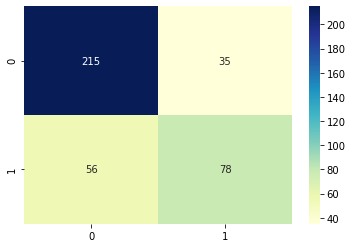

In [57]:
#heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [58]:
#evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7630208333333334
Precision: 0.6902654867256637
Recall: 0.582089552238806


6. What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

Accuracy sometimes isn't the best metric to rate a model's performance, ex. when trying to predict/detect a disease which is uncommon among the general public.  

Recall is the number of true positives divided by the number of true positives plus the number of false negatives.  It rates a model's ability to identify all relevant cases in a population.

Precision is the number of true positives divided by the number of true positives plus the number of false positives.  It rates a model's ability to identify *only* the relevant data points of a population.

As we increase precision, we decrease recall and vice-versa; fine tuning a model between the two a balancing act, and dependent on which metric is more important to the classification problem at hand.

In the case of the diabetes dataset, recall may be more important than precision.  In an ideal world, it would be great to have a low number of false positives so that fewer people are mistakenly diagnosed with diabetes.  In the real world, it is probably more important to have a lower number of false negatives - aka, people who are misdiagnosed as *not* having diabetes and thus missing out on potentially critical medical care.

7. Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

The KNN model has both lower precision (0.6567164179104478) and recall (0.3283582089552239) than the multiple logistic model (Precision: 0.6902654867256637; Recall: 0.582089552238806), so the latter is more performant for the diabetes dataset.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 0]


In [61]:
print(knn.score(X_test, y_test))

0.7057291666666666


In [63]:
#evaluation metrics
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Precision: 0.6567164179104478
Recall: 0.3283582089552239
